In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
# 그래프에서 한글 깨짐 방지
import platform
if platform.system() == "Darwin":          # MAC인 경우
    plt.rc('font', family ="AppleGothic")
else:
    plt.rc('font',family='Malgun Gothic')

#멧플로립에서 음수를 표시
plt.rc('axes',unicode_minus=False)

#워닝 메시지
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('../data/상장raw2.csv', encoding='euc-kr')
df상장 = pd.read_excel('../data/kospi+kodaq_dp(등급).xls')

In [3]:
df['회계년도']= df['회계년도'].replace('/','').astype(str).str[:4].astype(int)
df = df[df['회계년도'] == 2022]

In [4]:
df['FCF'] = df['영업활동으로 인한 현금흐름(간접법)(*)(IFRS연결)(천원)'] + df['투자활동으로 인한 현금흐름(*)(IFRS연결)(천원)']
df['매출액대비잉여현금흐름'] = df['FCF'] / df['매출액(수익)(*)(IFRS연결)(천원)']
df['총자산대비영업현금흐름'] = df['영업활동으로 인한 현금흐름(간접법)(*)(IFRS연결)(천원)'] / df['자산(*)(IFRS연결)(천원)']
df['PBR'] = df['PBR(최고)(IFRS)'] + df['PBR(최저)(IFRS)'] /2

'부채비율' : 0.30259864,
'총자본회전률' : -1.0667429,
'매출액대비잉여현금흐름' : -0.03715004,
'PBR' : 0.33048908,
'총자산대비영업현금흐름' : 0.12926251,
'자기자본증가율' : 0.36731349,
'총자본투자효율' : 0.33997948,
'총자본순이익률' : -0.94653419,
'매출액영업이익률' : 0.35456208
'constant' : -0.71344978

In [5]:
df = df[['회사명', '거래소코드', '부채비율(IFRS연결)', '총자본회전률(IFRS연결)', '매출액대비잉여현금흐름', 'PBR', '총자산대비영업현금흐름', '자기자본증가율(IFRS연결)', '총자본투자효율(IFRS연결)', '총자본순이익률(IFRS연결)', '매출액정상영업이익률(IFRS연결)' ]]

In [6]:
df['거래소코드'] = df['거래소코드'].astype(str).str.zfill(6)

In [7]:
df상장.dropna(axis=0, inplace=True)

In [8]:
df상장['Stock'] = df상장['Stock'].astype(int)

In [9]:
df상장['Stock'] = df상장['Stock'].astype(str).str.zfill(6)

In [10]:
df상장.columns = ['KIS', '거래소코드', '회사명_1', '신용평점']

In [11]:
df_total = pd.merge(df,df상장,how='inner',on='거래소코드')

In [12]:
df_total['신용평점']=df_total['신용평점'].map({
    'AAA' : 'AA',
    'AA':'AA',
    'A':'A',
    'BBB':'BBB',
    'BB':'BB',
    'B':'B',
    'CCC':'C',
    'CC':'C',
    'C': 'C',
    'D':'C'

})

In [13]:
df_total.isna().sum()

회사명                   0
거래소코드                 0
부채비율(IFRS연결)          7
총자본회전률(IFRS연결)        7
매출액대비잉여현금흐름           3
PBR                   7
총자산대비영업현금흐름           3
자기자본증가율(IFRS연결)       7
총자본투자효율(IFRS연결)       7
총자본순이익률(IFRS연결)       7
매출액정상영업이익률(IFRS연결)    7
KIS                   0
회사명_1                 0
신용평점                  0
dtype: int64

In [14]:
df_total=df_total.dropna()

In [15]:
df_total = df_total.replace([np.inf, -np.inf], np.nan)  # inf 값을 NaN으로 대체
df_total = df_total.dropna()  # NaN이 있는 행 삭제

In [16]:
df_total

,회사명,거래소코드,부채비율(IFRS연결),총자본회전률(IFRS연결),매출액대비잉여현금흐름,PBR,총자산대비영업현금흐름,자기자본증가율(IFRS연결),총자본투자효율(IFRS연결),총자본순이익률(IFRS연결),매출액정상영업이익률(IFRS연결),KIS,회사명_1,신용평점
0,(주)CMG제약,058820,15.31,0.40,-0.072149,3.980,0.023153,0.14,7.18,-0.19,3.63,172353,(주)CMG제약,BBB
1,(주)DB하이텍,000990,29.57,0.91,0.011923,2.925,0.343931,48.12,50.35,30.43,45.89,350354,(주)DB하이텍,A
2,(주)ES큐브,050120,10.24,0.12,-1.337584,1.745,-0.439465,29.87,30.78,4.10,20.40,013048,(주)ES큐브,A
3,(주)HJ중공업,097230,566.95,0.72,0.026821,2.190,0.032938,-10.88,9.22,-2.03,0.37,492466,(주)에이치제이중공업,C
4,(주)MH에탄올,023150,369.03,0.25,-0.003073,2.120,0.036826,5.94,12.08,2.65,19.80,311316,(주)MH에탄올,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2233,휴림로봇(주),090710,41.42,0.52,0.022483,16.560,-0.038423,-21.48,-0.46,-11.27,-13.46,123787,휴림로봇(주),BB
2234,휴마시스(주),205470,34.84,1.17,-0.254806,4.235,0.433329,71.65,55.73,45.19,45.56,M13779,휴마시스(주),A
2235,휴젤(주),145020,23.58,0.27,-0.394800,4.080,0.076803,1.93,12.58,5.89,35.99,388655,휴젤(주),BBB
2236,흥구석유(주),024060,17.29,1.66,-0.058023,2.740,0.025666,1.51,8.18,3.01,0.93,620378,흥구석유(주),A


In [17]:
df_total.drop('회사명_1', axis=1, inplace=True)

In [18]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_total.iloc[:,2:-2] = scaler.fit_transform(df_total.iloc[:,2:-2])

In [20]:
df_total.describe()

,부채비율(IFRS연결),총자본회전률(IFRS연결),매출액대비잉여현금흐름,PBR,총자산대비영업현금흐름,자기자본증가율(IFRS연결),총자본투자효율(IFRS연결),총자본순이익률(IFRS연결),매출액정상영업이익률(IFRS연결)
count,2227.000000,2227.000000,2227.000000,2227.000000,2227.000000,2227.000000,2227.000000,2227.000000,2227.000000
mean,0.009376,0.171388,0.681260,0.041074,0.787955,0.232413,0.569429,0.546563,0.994068
std,0.029879,0.111967,0.022114,0.035664,0.048730,0.024124,0.046267,0.065598,0.035401
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.002553,0.095634,0.682402,0.029646,0.771888,0.229172,0.553566,0.534290,0.996537
50%,0.005396,0.151767,0.682835,0.033728,0.792553,0.230409,0.571014,0.558475,0.996791
75%,0.009970,0.226611,0.683060,0.041754,0.810143,0.232219,0.589510,0.576821,0.997053
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [25]:
df_total.columns = ['회사명', '거래소코드', '부채비율', '총자본회전률', '매출액대비잉여현금흐름', 'PBR',
       '총자산대비영업현금흐름', '자기자본증가율', '총자본투자효율', '총자본순이익률',
       '매출액영업이익률', 'KIS', '신용평점']

In [27]:
coefficients = {
    '부채비율' : np.exp(-0.30259864),
    '총자본회전률' : np.exp(1.0667429),
    '매출액대비잉여현금흐름' : np.exp(0.03715004),
    'PBR' : np.exp(-0.33048908),
    '총자산대비영업현금흐름' : np.exp(-0.12926251),
    '자기자본증가율' : np.exp(-0.36731349),
    '총자본투자효율' : np.exp(-0.33997948),
    '총자본순이익률' : np.exp(0.94653419),
    '매출액영업이익률' : np.exp(-0.35456208),
    'constant' : 0.71344978
}

# O-Score 계산
df_total['dp_score'] = coefficients['constant']
df_total['dp_score'] += coefficients['부채비율'] * df_total['부채비율']
df_total['dp_score'] += coefficients['총자본회전률'] * df_total['총자본회전률']
df_total['dp_score'] += coefficients['매출액대비잉여현금흐름'] * df_total['매출액대비잉여현금흐름']
df_total['dp_score'] += coefficients['PBR'] * df_total['PBR']
df_total['dp_score'] += coefficients['총자산대비영업현금흐름'] * df_total['총자산대비영업현금흐름']
df_total['dp_score'] += coefficients['자기자본증가율'] * df_total['자기자본증가율']
df_total['dp_score'] += coefficients['총자본투자효율'] * df_total['총자본투자효율']
df_total['dp_score'] += coefficients['총자본순이익률'] * df_total['총자본순이익률']
df_total['dp_score'] += coefficients['매출액영업이익률'] * df_total['매출액영업이익률']

In [123]:
# lower_bound = df_total['dp_score'].quantile(0.01)
# upper_bound = df_total['dp_score'].quantile(0.99)
# df_total_filtered = df_total[(df_total['dp_score'] >= lower_bound) & (df_total['dp_score'] <= upper_bound)]

In [31]:
# # 각 등급별로 1% 절사를 수행하는 함수 정의
# def trim_by_grade(group):
#     lower_bound = group['dp_score'].quantile(0.01)
#     upper_bound = group['dp_score'].quantile(0.99)
#     return group[(group['dp_score'] >= lower_bound) & (group['dp_score'] <= upper_bound)]

# # 등급별로 1% 절사 수행
# df_total_filtered_2 = df_total.groupby('신용평점').apply(trim_by_grade)

In [125]:
# df_total[['dp_score','신용평점']].groupby('신용평점').agg(['mean', lambda x: x.quantile(0.25), lambda x: x.quantile(0.5), lambda x: x.quantile(0.75)])

In [28]:
df_total[['dp_score','신용평점']].groupby('신용평점').mean()        # 이걸로 쓸거임

,dp_score
신용평점,
A,5.478527
AA,5.371351
B,5.204838
BB,5.390075
BBB,5.469861
C,4.793609


In [34]:
# 각 등급별로 1% 절사를 수행하는 함수 정의
def trim_by_grade(group):
    lower_bound = group['dp_score'].quantile(0.005)
    upper_bound = group['dp_score'].quantile(0.995)
    return group[(group['dp_score'] >= lower_bound) & (group['dp_score'] <= upper_bound)]

# 등급별로 1% 절사 수행
df_total_filtered_2 = df_total.groupby('신용평점').apply(trim_by_grade)

In [127]:
# df_total_filtered_2.reset_index(drop=True, inplace=True)
# df_total_filtered_2[['dp_score','신용평점']].groupby('신용평점').mean()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


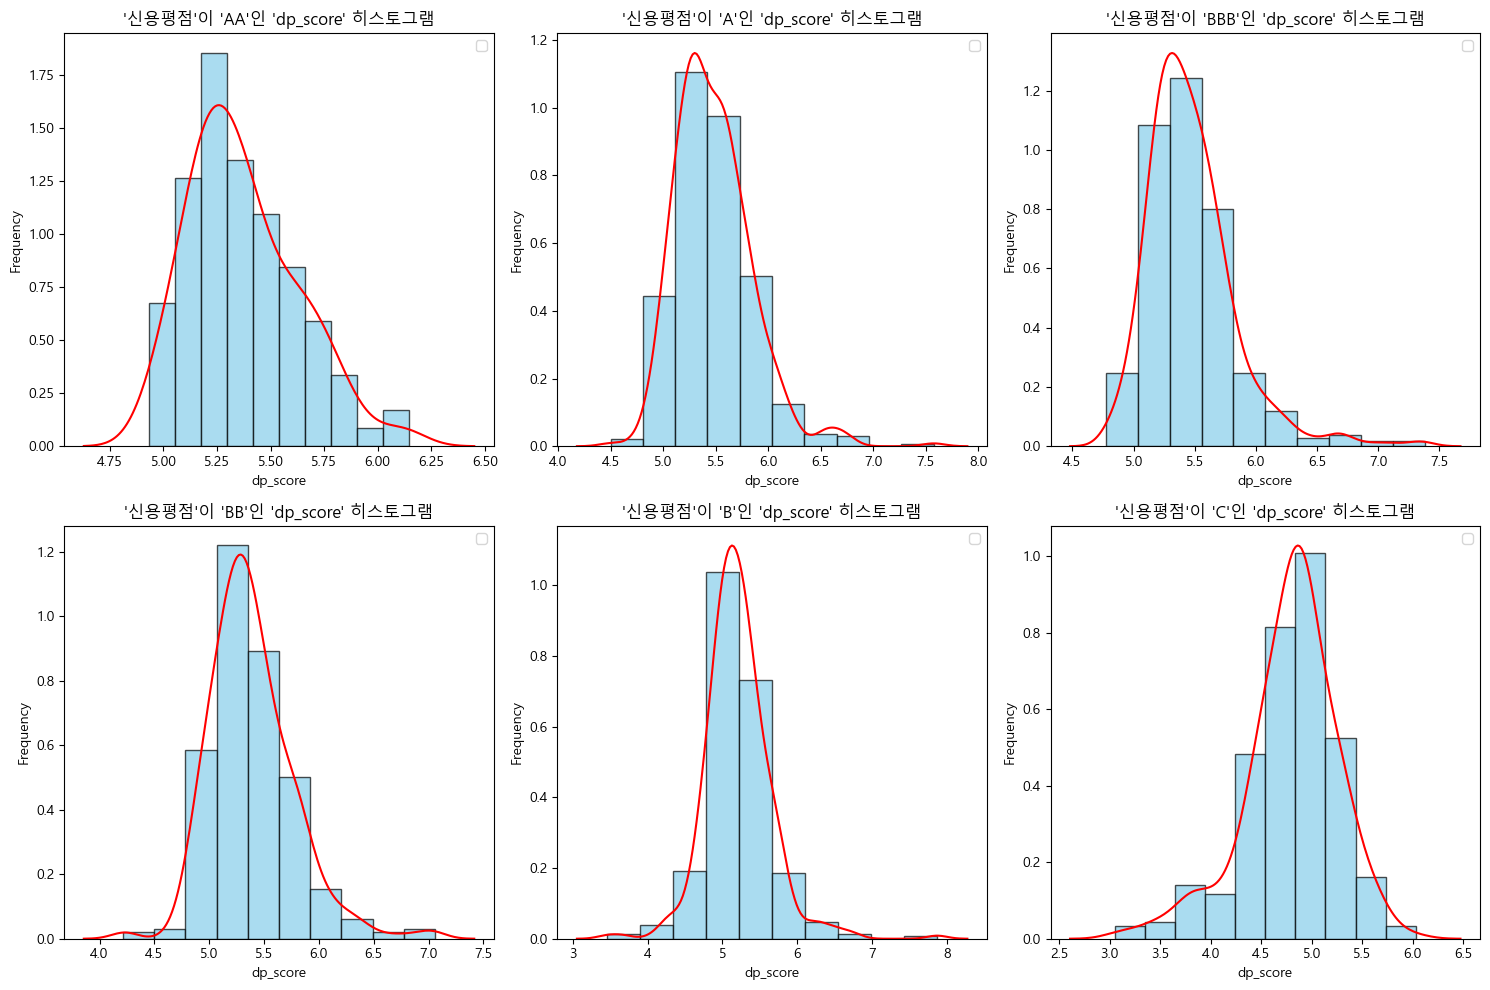

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

def draw_subplots(dataframe):
    # 신용평점 종류 리스트
    credit_ratings = ['AA', 'A', 'BBB', 'BB', 'B', 'C']

    # 2x3 서브플롯 생성
    fig, axes = plt.subplots(2, 3, figsize=(15, 10))
    axes = axes.flatten()

    for i, credit_rating in enumerate(credit_ratings):
        # '신용평점'이 해당 등급인 행들의 'dp_score' 열 데이터를 가져옵니다.
        filtered_data = dataframe[dataframe['신용평점'] == credit_rating]['dp_score']

        # 히스토그램 그리기
        axes[i].hist(filtered_data, bins=10, density=True, alpha=0.7, color='skyblue', edgecolor='black')

        # 확률밀도선 그리기
        sns.kdeplot(filtered_data, color='red', ax=axes[i])

        # 타이틀 및 라벨 추가
        axes[i].set_title(f"'신용평점'이 '{credit_rating}'인 'dp_score' 히스토그램")
        axes[i].set_xlabel('dp_score')
        axes[i].set_ylabel("Frequency")
        axes[i].legend()

    # 서브플롯 간 간격 조정
    plt.tight_layout()

    # 그래프 출력
    plt.show()

# 데이터프레임에는 'df_total_filtered_2'를 사용하도록 가정합니다.
draw_subplots(df_total)